In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#  \t will help us divide the data into two parts i.e. left one (spam or ham) is a dependent feature and right one is independent feature
df = pd.read_csv('/content/drive/MyDrive/spam.csv',encoding="latin-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Data cleaning and preprocessing

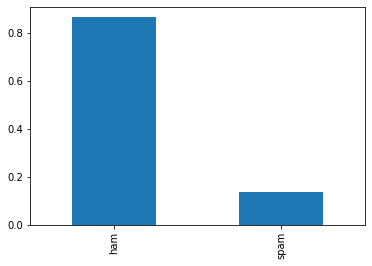

In [ ]:
df["v1"].value_counts(normalize=True).plot(kind="bar")
plt.show()

In [ ]:
df.columns=["Label","Message"]
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer() #initialized variable for PorterStemmer

for i in range(0,len(df)):
    review = re.sub('[^a-zA-Z]', ' ', df['Message'][i])    # removing unnecessary characters,fullstops,etc except a-z and A-Z and will replace that by blank
    review = review.lower() # converts everything in lowercase
    review = review.split() # by splitting i will get list of words and then i will do stemming
    review=[ps.stem(word) for word in review if not word in set(stopwords.words("english"))]
    review=" ".join(review)
    df["Message"][i]=review
df.head()


,Label,Message
0,ham,go jurong point crazi avail bugi n great world...
1,ham,ok lar joke wif u oni
2,spam,free entri wkli comp win fa cup final tkt st m...
3,ham,u dun say earli hor u c alreadi say
4,ham,nah think goe usf live around though


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
# Creating Bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer(max_features=2500)
X=cv.fit_transform(df["Message"]).toarray()
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [ ]:
# pandas.get_dummies Convert categorical variable into dummy variables.
y=pd.get_dummies(df['Label'])
print(y)
y=y.iloc[:,1]
y.head

      ham  spam
0       1     0
1       1     0
2       0     1
3       1     0
4       1     0
...   ...   ...
5567    0     1
5568    1     0
5569    1     0
5570    1     0
5571    1     0

[5572 rows x 2 columns]


<bound method NDFrame.head of 0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: spam, Length: 5572, dtype: uint8>

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,y,test_size=0.20 ,random_state=1)
from imblearn.over_sampling import SMOTE
sm=SMOTE(random_state=0)
X_train_res,Y_train_res=sm.fit_resample(X_train,Y_train)
print(sum(Y_train_res==1))
print(sum(Y_train_res==0))

3849
3849


In [ ]:
# Training model using Naive bayes classifier
from sklearn.naive_bayes import MultinomialNB
spam_detect=MultinomialNB().fit(X_train,Y_train)

In [ ]:
y_pred=spam_detect.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_m=confusion_matrix(Y_test,y_pred)
print(confusion_m)

[[965  11]
 [  4 135]]


In [ ]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(Y_test,y_pred)
print(accuracy)

0.9865470852017937


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       976
           1       0.92      0.97      0.95       139

    accuracy                           0.99      1115
   macro avg       0.96      0.98      0.97      1115
weighted avg       0.99      0.99      0.99      1115

